### Visualize Trips

In [10]:
import folium
import json
import random

# Function to generate a random color in hex format for markers
def random_color():
    return "#{:06x}".format(random.randint(0, 0xFFFFFF))

for i in range(1, 12):
    print(i)
    # Colors for start (src) and destination (dst) points
    start_marker_color = 'blue'
    end_marker_color = 'red'

    # Input JSON file containing the extracted trips
    input_file = f'../Clustering_Experiments/case_{i}.json'  # Adjust path to the JSON file

    # Initialize a Folium map centered at an average lat/lng (this can be adjusted)
    m = folium.Map(location=[31.95, 35.9], zoom_start=12)

    # Dictionary to store the trip_id and corresponding marker color for the legend
    trip_id_color_mapping = {}

    # Load the extracted trips from the JSON file
    with open(input_file, 'r') as infile:
        for line in infile:
            line = line.strip()
            if line:
                trip_data = json.loads(line)
                
                # Extract lats and lngs for the trip
                lats = trip_data['lats']
                lngs = trip_data['lngs']
                trip_id = trip_data['unique_trip']
                
                # Choose a random color for this trip
                trip_color = random_color()
                
                # Store the trip_id and its color for the legend
                trip_id_color_mapping[trip_id] = trip_color
                
                # Draw the trip as a continuous PolyLine connecting all points
                trip_coords = list(zip(lats, lngs))
                folium.PolyLine(
                    locations=trip_coords,
                    color=trip_color,
                    weight=2.5,
                    opacity=0.8,
                    popup=f'Trip ID: {trip_id}'
                ).add_to(m)

                # Add a marker for the start point (src) of the trip
                folium.Marker(
                    location=[lats[0], lngs[0]],  # Start point is the first coordinate
                    icon=folium.Icon(color=start_marker_color, icon='play'),
                    popup=f'Start of Trip {trip_id}'
                ).add_to(m)

                # Add a marker for the destination point (dst) of the trip
                folium.Marker(
                    location=[lats[-1], lngs[-1]],  # Destination point is the last coordinate
                    icon=folium.Icon(color=end_marker_color, icon='flag'),
                    popup=f'End of Trip {trip_id}'
                ).add_to(m)

    # # Add a cross marker at a specific location
    # cross_marker_location = [31.952, 35.932]
    # folium.Marker(
    #     location=cross_marker_location,
    #     icon=folium.Icon(icon='plus', color='black'),  # Cross marker
    #     popup='Cross Marker at (31.952, 35.932)'
    # ).add_to(m)

    # # Add a circular region of radius 10 meters around the cross marker
    # folium.Circle(
    #     location=cross_marker_location,
    #     radius=10,  # Radius in meters
    #     color='red',
    #     fill=True,
    #     fill_opacity=0.3,
    #     popup='10 meter radius circle'
    # ).add_to(m)

    # Create a custom HTML legend to map trip_id to color
    legend_html = '''
    <div style="position: fixed; 
        bottom: 50px; left: 50px; width: 300px; height: auto; 
        background-color: white; z-index:9999; font-size:14px;
        border:2px solid grey; padding: 10px;">
        <h4>Trip ID to Color Mapping</h4>
        <ul style="list-style-type:none; padding-left: 0;">
    '''

    # Add each trip_id and its color to the legend, truncating the trip ID to 5 characters
    for trip_id, color in trip_id_color_mapping.items():
        truncated_trip_id = str(trip_id)[:5]  # Truncate to 5 characters
        legend_html += f'<li><span style="color:{color};">&#9679;</span> {truncated_trip_id}</li>'

    legend_html += '''
        </ul>
    </div>
    '''

    # Add the legend to the map
    m.get_root().html.add_child(folium.Element(legend_html))

    # Save the map to an HTML file
    output_map_file = f'NOW_{i}.html'
    m.save(output_map_file)

    print(f"Map with continuous trip segments, markers, cross marker, circular region, and legend saved as {output_map_file}")


1
Map with continuous trip segments, markers, cross marker, circular region, and legend saved as NOW_1.html
2
Map with continuous trip segments, markers, cross marker, circular region, and legend saved as NOW_2.html
3
Map with continuous trip segments, markers, cross marker, circular region, and legend saved as NOW_3.html
4
Map with continuous trip segments, markers, cross marker, circular region, and legend saved as NOW_4.html
5
Map with continuous trip segments, markers, cross marker, circular region, and legend saved as NOW_5.html
6
Map with continuous trip segments, markers, cross marker, circular region, and legend saved as NOW_6.html
7
Map with continuous trip segments, markers, cross marker, circular region, and legend saved as NOW_7.html
8
Map with continuous trip segments, markers, cross marker, circular region, and legend saved as NOW_8.html
9
Map with continuous trip segments, markers, cross marker, circular region, and legend saved as NOW_9.html
10
Map with continuous trip 

In [9]:
import pandas as pd
import json

def detect_stationary_intervals(lngs, lats):
    # Create a dataframe with longitude and latitude
    df = pd.DataFrame({'lng': lngs, 'lat': lats})
    
    # Detect if the object is stationary, i.e., no change in longitude and latitude
    df['stationary'] = (df['lng'].diff() == 0) & (df['lat'].diff() == 0)
    
    # Group consecutive stationary points
    stationary_intervals = df[df['stationary']].index.to_series().groupby((df['stationary'] != df['stationary'].shift()).cumsum()).apply(lambda x: (x.min(), x.max()))
    
    # Filter to get intervals of stationary periods
    return stationary_intervals


# Input JSON file containing the extracted trips
input_file = '../extracted_trips_split_trips_2024-01-28.json'
# Load the extracted trips from the JSON file
with open(input_file, 'r') as infile:
    for line in infile:
        line = line.strip()
        if line:
            trip_data = json.loads(line)
            
            # Extract lats and lngs for the trip
            lats = trip_data['lats']
            lngs = trip_data['lngs']

# Detect stationary intervals
stationary_intervals = detect_stationary_intervals(lngs, lats)

# Print the intervals
print(stationary_intervals)


stationary
2       (1, 15)
4      (18, 18)
6      (20, 20)
8      (23, 23)
10     (25, 26)
12     (29, 30)
14    (32, 390)
dtype: object


In [14]:
# display the size of the list of lats
print(len(trip_data['lngs']))


392


### Visualize Trips

In [1]:
import folium
import json
import random

# Function to generate a random color in hex format for markers
def random_color():
    return "#{:06x}".format(random.randint(0, 0xFFFFFF))

# Colors for start (src) and destination (dst) points
start_marker_color = 'blue'
end_marker_color = 'red'

# Input JSON file containing the extracted trips
# input_file = '../extracted_trips_split_trips_2024-01-28.json'
input_file = '../5_trips_case/test.json'

# Initialize a Folium map centered at an average lat/lng (this can be adjusted)
m = folium.Map(location=[31.95, 35.9], zoom_start=12)

# Dictionary to store the trip_id and corresponding marker color for the legend
trip_id_color_mapping = {}

# Load the extracted trips from the JSON file
with open(input_file, 'r') as infile:
    for line in infile:
        line = line.strip()
        if line:
            trip_data = json.loads(line)
            
            # Extract lats and lngs for the trip
            lats = trip_data['lats']
            lngs = trip_data['lngs']
            trip_id = trip_data['trip_id']
            
            # Choose a random color for this trip's markers
            marker_color = random_color()
            
            # Store the trip_id and its marker color for the legend
            trip_id_color_mapping[trip_id] = marker_color
            
            # Add markers for each point in the trip
            for lat, lng in zip(lats, lngs):
                folium.CircleMarker(
                    location=[lat, lng],
                    radius=3,
                    color='blue',
                    fill=True,
                    fill_opacity=0.7,
                    popup=f'Trip ID: {trip_id} - Point ({lat}, {lng})'
                ).add_to(m)

            # Add a marker for the start point (src) of the trip
            folium.Marker(
                location=[lats[0], lngs[0]],  # Start point is the first coordinate
                icon=folium.Icon(color=start_marker_color, icon='play'),
                popup=f'Start of Trip {trip_id}'
            ).add_to(m)

            # Add a marker for the destination point (dst) of the trip
            folium.Marker(
                location=[lats[-1], lngs[-1]],  # Destination point is the last coordinate
                icon=folium.Icon(color=end_marker_color, icon='flag'),
                popup=f'End of Trip {trip_id}'
            ).add_to(m)

# Add a cross marker at (31.95, 35.872)
cross_marker_location = [31.952,35.932]
folium.Marker(
    location=cross_marker_location,
    icon=folium.Icon(icon='plus', color='black'),  # Cross marker
    popup='Cross Marker at (31.952,35.932'
).add_to(m)

# # Add a circular region of radius 5 meters around (31.95, 35.872)
# folium.Circle(
#     location=cross_marker_location,
#     radius=10,  # Radius in meters
#     color='red',
#     fill=True,
#     fill_opacity=0.3,
#     popup='5 meter radius circle'
# ).add_to(m)

# Create a custom HTML legend to map trip_id to marker color
legend_html = '''
<div style="position: fixed; 
     bottom: 50px; left: 50px; width: 300px; height: 300px; 
     background-color: white; z-index:9999; font-size:14px;
     border:2px solid grey; padding: 10px;">
     <h4>Trip ID to Color Mapping</h4>
     <ul style="list-style-type:none; padding-left: 0;">
'''

# Add each trip_id and its color to the legend
for trip_id, color in trip_id_color_mapping.items():
    legend_html += f'<li><span style="color:{color};">&#9679;</span> {trip_id}</li>'

legend_html += '''
    </ul>
</div>
'''

# Add the legend to the map
m.get_root().html.add_child(folium.Element(legend_html))

# Save the map to an HTML file
output_map_file = 'map_without_connections.html'
m.save(output_map_file)

print(f"Map with trip coordinates (unconnected), markers, cross marker, circular region, and legend saved as {output_map_file}")


Map with trip coordinates (unconnected), markers, cross marker, circular region, and legend saved as map_without_connections.html


## Menu

In [2]:
import folium
import json
import random

# Function to generate a random color in hex format for markers
def random_color():
    return "#{:06x}".format(random.randint(0, 0xFFFFFF))

# Colors for start (src) and destination (dst) points
start_marker_color = 'blue'
end_marker_color = 'red'

# Input JSON file containing the extracted trips
# input_file = '../extracted_trips_split_trips_2024-01-28.json'
input_file = '../5_trips_case/test.json'

# Initialize a Folium map centered at an average lat/lng (this can be adjusted)
m = folium.Map(location=[31.95, 35.9], zoom_start=12)

# Dictionary to store the trip_id and corresponding marker color for the legend
trip_id_color_mapping = {}

# Load the extracted trips from the JSON file
with open(input_file, 'r') as infile:
    for line in infile:
        line = line.strip()
        if line:
            trip_data = json.loads(line)
            
            # Extract lats and lngs for the trip
            lats = trip_data['lats']
            lngs = trip_data['lngs']
            trip_id = trip_data['trip_id']
            
            # Choose a random color for this trip's markers
            marker_color = random_color()
            
            # Store the trip_id and its marker color for the legend
            trip_id_color_mapping[trip_id] = marker_color
            
            # Add markers for each point in the trip
            for lat, lng in zip(lats, lngs):
                folium.CircleMarker(
                    location=[lat, lng],
                    radius=3,
                    color=marker_color,
                    fill=True,
                    fill_opacity=0.7,
                    popup=f'Trip ID: {trip_id} - Point ({lat}, {lng})'
                ).add_to(m)

            # Add a marker for the start point (src) of the trip
            folium.Marker(
                location=[lats[0], lngs[0]],  # Start point is the first coordinate
                icon=folium.Icon(color=start_marker_color, icon='play'),
                popup=f'Start of Trip {trip_id}'
            ).add_to(m)

            # Add a marker for the destination point (dst) of the trip
            folium.Marker(
                location=[lats[-1], lngs[-1]],  # Destination point is the last coordinate
                icon=folium.Icon(color=end_marker_color, icon='flag'),
                popup=f'End of Trip {trip_id}'
            ).add_to(m)

# Add a cross marker at (31.95, 35.872)
cross_marker_location = [31.95, 35.872]
folium.Marker(
    location=cross_marker_location,
    icon=folium.Icon(icon='plus', color='black'),  # Cross marker
    popup='Cross Marker at (31.95, 35.872)'
).add_to(m)

# # Add a circular region of radius 5 meters around (31.95, 35.872)
# folium.Circle(
#     location=cross_marker_location,
#     radius=100,  # Radius in meters
#     color='pink',
#     fill=True,
#     fill_opacity=0.3,
#     popup='5 meter radius circle'
# ).add_to(m)

# Create a custom HTML legend to map trip_id to marker color
legend_html = '''
<div style="position: fixed; 
     bottom: 50px; left: 50px; width: 300px; height: 300px; 
     background-color: white; z-index:9999; font-size:14px;
     border:2px solid grey; padding: 10px;">
     <h4>Trip ID to Color Mapping</h4>
     <ul style="list-style-type:none; padding-left: 0;">
'''

# Add each trip_id and its color to the legend
for trip_id, color in trip_id_color_mapping.items():
    legend_html += f'<li><span style="color:{color};">&#9679;</span> {trip_id}</li>'

legend_html += '''
    </ul>
</div>
'''

# Add the legend to the map
m.get_root().html.add_child(folium.Element(legend_html))

# Save the map to an HTML file
output_map_file = 'menu_map_without_connections.html'
m.save(output_map_file)

print(f"Map with trip coordinates (unconnected), markers, cross marker, circular region, and legend saved as {output_map_file}")


Map with trip coordinates (unconnected), markers, cross marker, circular region, and legend saved as menu_map_without_connections.html


In [20]:
import folium
import json
import random

# Function to generate a random color in hex format for markers
def random_color():
    return "#{:06x}".format(random.randint(0, 0xFFFFFF))

# Colors for start (src) and destination (dst) points
start_marker_color = 'blue'
end_marker_color = 'red'

# Input JSON file containing the extracted trips
# input_file = '../extracted_trips_split_trips_2024-01-28.json'
input_file = '../5_trips_case/test.json'

# Initialize a Folium map centered at an average lat/lng (this can be adjusted)
m = folium.Map(location=[31.95, 35.9], zoom_start=12)

# Dictionary to store the trip_id and corresponding marker color for the legend
trip_id_color_mapping = {}

# Load the extracted trips from the JSON file
with open(input_file, 'r') as infile:
    for line in infile:
        line = line.strip()
        if line:
            trip_data = json.loads(line)
            
            # Extract lats and lngs for the trip
            lats = trip_data['lats']
            lngs = trip_data['lngs']
            trip_id = trip_data['trip_id']
            
            # Choose a random color for this trip's markers
            marker_color = random_color()
            
            # Store the trip_id and its marker color for the legend
            trip_id_color_mapping[trip_id] = marker_color
            
            # Add markers for each point in the trip
            for lat, lng in zip(lats, lngs):
                folium.CircleMarker(
                    location=[lat, lng],
                    radius=3,
                    color='blue',
                    fill=True,
                    fill_opacity=0.7,
                    popup=f'Trip ID: {trip_id} - Point ({lat}, {lng})'
                ).add_to(m)

            # Add a marker for the start point (src) of the trip
            folium.Marker(
                location=[lats[0], lngs[0]],  # Start point is the first coordinate
                icon=folium.Icon(color=start_marker_color, icon='play'),
                popup=f'Start of Trip {trip_id}'
            ).add_to(m)

            # Add a marker for the destination point (dst) of the trip
            folium.Marker(
                location=[lats[-1], lngs[-1]],  # Destination point is the last coordinate
                icon=folium.Icon(color=end_marker_color, icon='flag'),
                popup=f'End of Trip {trip_id}'
            ).add_to(m)

# Add a cross marker at (31.95, 35.872)
cross_marker_location = [31.952,35.932]
folium.Marker(
    location=cross_marker_location,
    icon=folium.Icon(icon='plus', color='black'),  # Cross marker
    popup='Cross Marker at (31.952,35.932'
).add_to(m)

# Add a circular region of radius 5 meters around (31.95, 35.872)
folium.Circle(
    location=cross_marker_location,
    radius=10,  # Radius in meters
    color='red',
    fill=True,
    fill_opacity=0.3,
    popup='5 meter radius circle'
).add_to(m)

# Create a custom HTML legend to map trip_id to marker color
legend_html = '''
<div style="position: fixed; 
     bottom: 50px; left: 50px; width: 300px; height: 300px; 
     background-color: white; z-index:9999; font-size:14px;
     border:2px solid grey; padding: 10px;">
     <h4>Trip ID to Color Mapping</h4>
     <ul style="list-style-type:none; padding-left: 0;">
'''

# Add each trip_id and its color to the legend
for trip_id, color in trip_id_color_mapping.items():
    legend_html += f'<li><span style="color:{color};">&#9679;</span> {trip_id}</li>'

legend_html += '''
    </ul>
</div>
'''

# Add the legend to the map
m.get_root().html.add_child(folium.Element(legend_html))

# Save the map to an HTML file
output_map_file = 'menu_map_without_connections.html'
m.save(output_map_file)

print(f"Map with trip coordinates (unconnected), markers, cross marker, circular region, and legend saved as {output_map_file}")


Map with trip coordinates (unconnected), markers, cross marker, circular region, and legend saved as menu_map_without_connections.html


In [ ]:
# ../extracted_trips_split_trips_2024-01-28.json

### Old Code

In [15]:
import json

def process_json_file(file_path):
    min_lat = float('inf')
    max_lat = float('-inf')
    min_lng = float('inf')
    max_lng = float('-inf')

    with open(file_path, 'r') as file:
        for line in file:
            if line.strip():  # Check if line is not empty
                data = json.loads(line)
                lats = data.get('lats', [])
                lngs = data.get('lngs', [])
                
                if lats:
                    min_lat = min(min_lat, min(lats))
                    max_lat = max(max_lat, max(lats))
                
                if lngs:
                    min_lng = min(min_lng, min(lngs))
                    max_lng = max(max_lng, max(lngs))

    print(f"Min Latitude: {min_lat}")
    print(f"Max Latitude: {max_lat}")
    print(f"Min Longitude: {min_lng}")
    print(f"Max Longitude: {max_lng}")

# Replace 'your_file_path.json' with the actual path to your JSON file
process_json_file('updated_trips.json')


Min Latitude: 31.784
Max Latitude: 32.117
Min Longitude: 35.747
Max Longitude: 36.018


#### Create an HTML Map File

In [1]:
import json
import pandas as pd
import folium

# Load the data
file_path = '../extracted_trips_split_trips_2024-01-28.json'

# Read the JSON lines into a DataFrame
with open(file_path, 'r') as file:
    data = [json.loads(line) for line in file]

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Initialize a folium map
m = folium.Map(location=[31.5, 35.5], zoom_start=10)

# Add trip data to the map
for _, row in df.iterrows():
    trip_id = row['trip_id']
    lats = row['lats']
    lngs = row['lngs']
    points = list(zip(lats, lngs))
    folium.PolyLine(points, color="blue", weight=2.5, opacity=1, tooltip=f'Trip ID: {trip_id}').add_to(m)
    # folium.Marker(location=points[0], popup=f'Start: {trip_id}', icon=folium.Icon(color='green')).add_to(m)
    # folium.Marker(location=points[-1], popup=f'End: {trip_id}', icon=folium.Icon(color='red')).add_to(m)

# Display the map
m.save('map_extracted_trips_split_trips_2024-01-28.html')
m


In [13]:
import json
import pandas as pd
import folium
from folium import Map, PolyLine

# Load the data
file_path = 'updated_trips.json'

# Read the JSON lines into a DataFrame
with open(file_path, 'r') as file:
    data = [json.loads(line) for line in file]

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Initialize a folium map
m = folium.Map(location=[31.5, 35.5], zoom_start=10)

# Add trip data to the map
for _, row in df.iterrows():
    trip_id = row['trip_id']
    lats = row['lats']
    lngs = row['lngs']
    points = list(zip(lats, lngs))
    
    polyline = folium.PolyLine(points, color="blue", weight=2.5, opacity=1, tooltip=f'Trip ID: {trip_id}')
    polyline.add_to(m)
    
    # Add a click event to copy trip_id to clipboard
    polyline.add_child(folium.features.JavascriptLink(f"""
    var polyline = {polyline.get_name()};
    polyline.on('click', function() {{
        var tripId = "{trip_id}";
        navigator.clipboard.writeText(tripId).then(function() {{
            alert('Copied Trip ID: ' + tripId);
        }}, function(err) {{
            console.error('Async: Could not copy text: ', err);
        }});
    }});
    """))

# Display the map
m.save('updated_trips_map.html')


In [4]:
import json
import pandas as pd
import folium
from folium import Map, PolyLine
from folium.features import CustomIcon

# Load the data
file_path = 'clean_trips.json'

# Read the JSON lines into a DataFrame
with open(file_path, 'r') as file:
    data = [json.loads(line) for line in file]

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Initialize a folium map
m = folium.Map(location=[31.5, 35.5], zoom_start=10)

# Add trip data to the map
for _, row in df.iterrows():
    trip_id = row['trip_id']
    lats = row['lats']
    lngs = row['lngs']
    points = list(zip(lats, lngs))
    
    polyline = folium.PolyLine(points, color="blue", weight=2.5, opacity=1, tooltip=f'Trip ID: {trip_id}')
    m.add_child(polyline)
    
    # Add a click event to copy trip_id to clipboard using a Custom JavaScript
    polyline.add_child(folium.ClickForMarker(popup=f'Trip ID: {trip_id}'))

# Add the custom JavaScript to the map
custom_js = """
function addClickListener(line, tripId) {
    line.on('click', function(e) {
        navigator.clipboard.writeText(tripId).then(function() {
            alert('Copied Trip ID: ' + tripId);
        }, function(err) {
            console.error('Async: Could not copy text: ', err);
        });
    });
}

document.addEventListener('DOMContentLoaded', function() {
    var layers = Object.keys(window).filter(key => key.startsWith('layer_'));
    layers.forEach(function(layerKey) {
        var layer = window[layerKey];
        var tripId = layer.options.title;
        addClickListener(layer, tripId);
    });
});
"""

m.get_root().html.add_child(folium.Element(f'<script>{custom_js}</script>'))

# Display the map
m.save('trips_map_4.html')


In [14]:
import json

def filter_trips_by_dist(file_path, dist_threshold):
    trip_ids = []
    
    with open(file_path, 'r') as file:
        for line in file:
            trip = json.loads(line)
            if trip.get('dist', 0) > dist_threshold and trip.get('dist', 0) < 100:
                trip_ids.append(trip['trip_id'])
    
    return trip_ids

# Replace 'your_file.json' with the path to your JSON file
file_path = 'updated_trips.json'
dist_threshold = 50

trip_ids = filter_trips_by_dist(file_path, dist_threshold)

print("Trip IDs with dist value greater than 100:")
for trip_id in trip_ids:
    print(trip_id)


Trip IDs with dist value greater than 100:


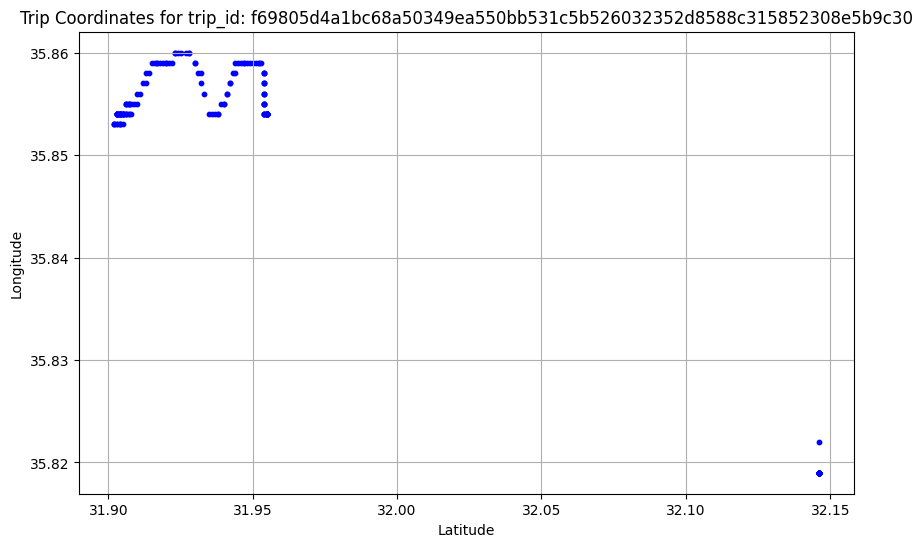

In [11]:
import json
import matplotlib.pyplot as plt

def plot_trip_coordinates(file_path, target_trip_id):
    trip_data = None
    
    with open(file_path, 'r') as file:
        for line in file:
            trip = json.loads(line)
            if trip['trip_id'] == target_trip_id:
                trip_data = trip
                break
    
    if trip_data is None:
        print(f"No trip found with trip_id: {target_trip_id}")
        return
    
    lats = trip_data['lats']
    lngs = trip_data['lngs']
    
    plt.figure(figsize=(10, 6))
    plt.scatter(lats, lngs, color='b', s=10)
    plt.title(f"Trip Coordinates for trip_id: {target_trip_id}")
    plt.xlabel("Latitude")
    plt.ylabel("Longitude")
    plt.grid(True)
    plt.show()

# Replace 'clean_trips.json' with the path to your JSON file and '493fbf38f7d6537dc822ebb1d31c67bcdf2eab87d0d736b102e7c73084b987e5' with the desired trip_id
file_path = 'clean_trips.json'
# target_trip_id = '493fbf38f7d6537dc822ebb1d31c67bcdf2eab87d0d736b102e7c73084b987e5'
target_trip_id = 'f69805d4a1bc68a50349ea550bb531c5b526032352d8588c315852308e5b9c30'

plot_trip_coordinates(file_path, target_trip_id)


In [12]:
import json

def remove_trips(file_path, output_file_path, trip_ids_to_remove):
    trips = []
    
    # Read the trips from the file
    with open(file_path, 'r') as file:
        for line in file:
            trips.append(json.loads(line))
    
    # Remove the trips with the specified trip_ids
    remaining_trips = [trip for trip in trips if trip['trip_id'] not in trip_ids_to_remove]
    
    # Save the remaining trips to the new file
    with open(output_file_path, 'w') as output_file:
        for trip in remaining_trips:
            output_file.write(json.dumps(trip) + '\n')
    
    print(f"Removed {len(trip_ids_to_remove)} trips and saved the remaining trips to {output_file_path}")

# Replace 'clean_trips.json' with the path to your JSON file and specify the output file name
file_path = 'updated_trips.json'
output_file_path = 'updated_trips.json'
# trip_ids_to_remove = [
#     '493fbf38f7d6537dc822ebb1d31c67bcdf2eab87d0d736b102e7c73084b987e5',
#     '7722f3a8d8753a61d0a5563fa3d0f345d942ad3aa2456c4f309b402a97ec9093',
#     '779a3d2ecc54e954c9ef39718503a3c754f27340ce809e4fc44f1cc6d3077498',
#     'f00e3a9f5da6501b92449497733f2841911d91ad081dd023d701cef5643e008d'
# ]

trip_ids_to_remove = [
    'f69805d4a1bc68a50349ea550bb531c5b526032352d8588c315852308e5b9c30'
]

remove_trips(file_path, output_file_path, trip_ids_to_remove)


Removed 1 trips and saved the remaining trips to updated_trips.json
